<a href="https://colab.research.google.com/github/acaicomdados/analise-reservatorios-federais/blob/main/An%C3%A1lise_reservatorios_federais_dia_8_6_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Análise dos reservatótios federais

Neste primeiro encontro será feito a formulação de hipoteses e uma análise inicial

- **Objetivos**
  - Fazer análise da vazão dos reservatorios, e ve houve um aumento uma que, ou se houve uma constante ao longo do tempo
  - Fazer relação com dados de meteorologia e dados de geração de energia elétrica nas hidrelétricas

- **Hipoteses a serem respondidas**
  - Houve uma diminuição nos reservatorios brasileiros (com nesta noticia [aqui](https://www.cnnbrasil.com.br/nacional/brasil-perde-15-de-superficie-de-agua-desde-o-comeco-dos-anos-1990/))
  - Há uma relação entre indices meteorologicos e vazão de água
  - Há uma relação da vazão de água com a produção de energia nas hidrelétricas

In [1]:
# importar as blibiotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
url ='https://raw.githubusercontent.com/acaicomdados/analise-reservatorios-federais/main/Datasets/reservatorio_geral_codigo_aneel.csv'
reservatorio = pd.read_csv(url)
reservatorio.drop(['Unnamed: 0','id_empreendimento_aneel','id_reservatorio_planejamento','id_posto_vazao'],
                  axis=1,inplace=True)
reservatorio.head()

,data,subsistema,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,bacia,rio,cota_maxima,cota_minima,...,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude,sistema,codigo,estado_sigla
0,2007-02-03,SUL,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,URUGUAI,CANOAS,660.0,655.0,...,129.62,0.009083,1.6063,m,2.48,-27.603056,-51.323611,sin,19068,SC
1,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,...,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,sin,19067,SC
2,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,...,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,sin,19067,RS
3,2013-09-24,SUL,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,URUGUAI,CANOAS,705.0,702.5,...,64.23,0.008626,0.3691,m,1.19,-27.624722,-50.983889,sin,19147,SC
4,2002-02-16,SUL,SUL,MACHADINHO,RESERVATORIO COM USINA,MACHADINHO,URUGUAI,URUGUAI,480.0,465.0,...,1055.81,0.009034,0.8779,m,1.48,-27.524444,-51.788889,sin,19069,SC


In [5]:
reservatorio = reservatorio[reservatorio['sistema']=='sin']
reservatorio.shape

(175, 22)

In [6]:
reservatorio.drop(['sistema','codigo'],axis=1,inplace=True)
reservatorio.head()

,data,subsistema,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,bacia,rio,cota_maxima,cota_minima,volume_maximo,volume_minimo,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude,estado_sigla
0,2007-02-03,SUL,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,URUGUAI,CANOAS,660.0,655.0,1477.00,1320.00,129.62,0.009083,1.6063,m,2.48,-27.603056,-51.323611,SC
1,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,4904.45,2711.79,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,SC
2,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,4904.45,2711.79,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,RS
3,2013-09-24,SUL,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,URUGUAI,CANOAS,705.0,702.5,296.00,232.00,64.23,0.008626,0.3691,m,1.19,-27.624722,-50.983889,SC
4,2002-02-16,SUL,SUL,MACHADINHO,RESERVATORIO COM USINA,MACHADINHO,URUGUAI,URUGUAI,480.0,465.0,3340.00,2283.00,1055.81,0.009034,0.8779,m,1.48,-27.524444,-51.788889,SC


Text(0, 0.5, 'Quantidade')

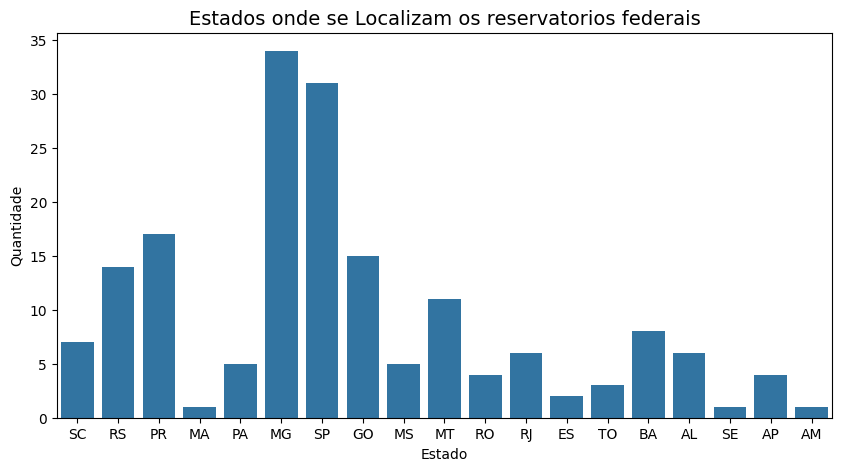

In [8]:
plt.figure(figsize=(10,5))
plt.title('Estados onde se Localizam os reservatorios federais',
          fontsize=14)
sns.countplot(x='estado_sigla',data=reservatorio)
plt.xlabel('Estado')
plt.ylabel('Quantidade')

In [10]:
reservatorio['data'] = pd.to_datetime(reservatorio['data'],format='%Y-%m-%d')
reservatorio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          175 non-null    datetime64[ns]
 1   subsistema                    175 non-null    object        
 2   reservatorio_equivalente      175 non-null    object        
 3   reservatorio                  175 non-null    object        
 4   tipo_reservatorio             175 non-null    object        
 5   usina                         175 non-null    object        
 6   bacia                         175 non-null    object        
 7   rio                           175 non-null    object        
 8   cota_maxima                   175 non-null    float64       
 9   cota_minima                   175 non-null    float64       
 10  volume_maximo                 175 non-null    float64       
 11  volume_minimo                 175 non

In [11]:
reservatorio['ano'] = reservatorio['data'].dt.year
reservatorio.head()

,data,subsistema,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,bacia,rio,cota_maxima,cota_minima,...,volume_minimo,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude,estado_sigla,ano
0,2007-02-03,SUL,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,URUGUAI,CANOAS,660.0,655.0,...,1320.00,129.62,0.009083,1.6063,m,2.48,-27.603056,-51.323611,SC,2007
1,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,...,2711.79,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,SC,2005
2,2005-11-01,SUL,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,PELOTAS,647.0,617.0,...,2711.79,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,RS,2005
3,2013-09-24,SUL,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,URUGUAI,CANOAS,705.0,702.5,...,232.00,64.23,0.008626,0.3691,m,1.19,-27.624722,-50.983889,SC,2013
4,2002-02-16,SUL,SUL,MACHADINHO,RESERVATORIO COM USINA,MACHADINHO,URUGUAI,URUGUAI,480.0,465.0,...,2283.00,1055.81,0.009034,0.8779,m,1.48,-27.524444,-51.788889,SC,2002


Text(0, 0.5, 'Quantidade')

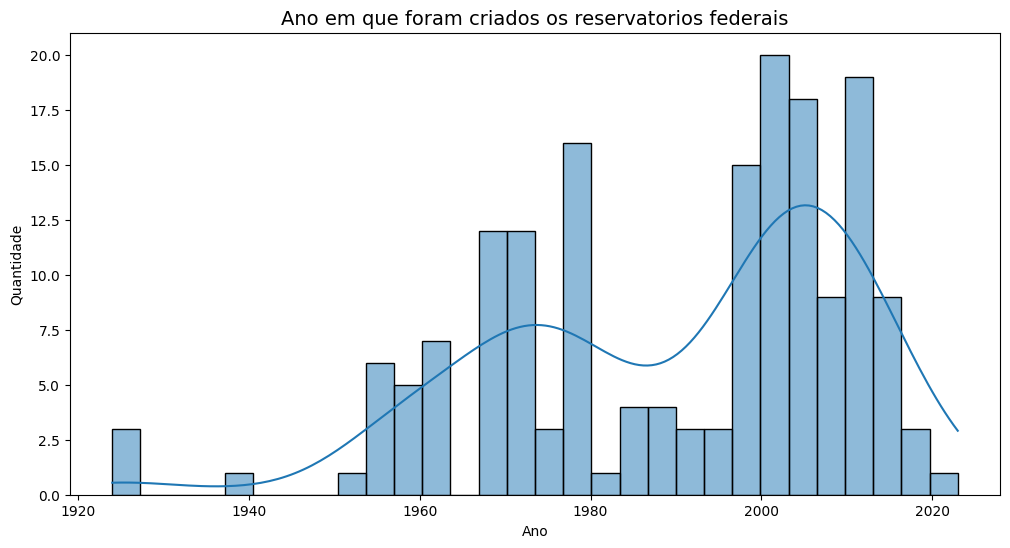

In [16]:
plt.figure(figsize=(12,6))
plt.title('Ano em que foram criados os reservatorios federais',
          fontsize=14)
sns.histplot(x='ano',data=reservatorio,bins=30,kde=True)
plt.xlabel('Ano')
plt.ylabel('Quantidade')

Text(0.5, 0, 'Quantidade')

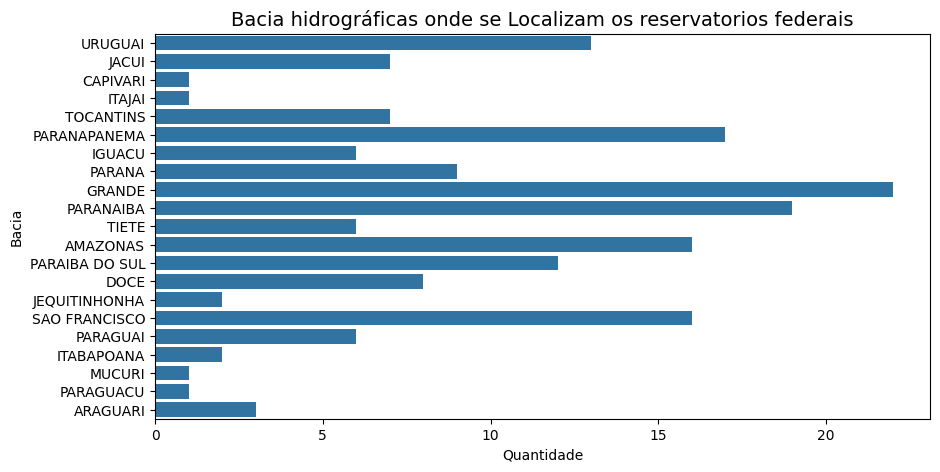

In [18]:
plt.figure(figsize=(10,5))
plt.title('Bacia hidrográficas onde se Localizam os reservatorios federais',
          fontsize=14)
sns.countplot(y='bacia',data=reservatorio)
plt.ylabel('Bacia')
plt.xlabel('Quantidade')

Text(0.5, 0, 'Quantidade')

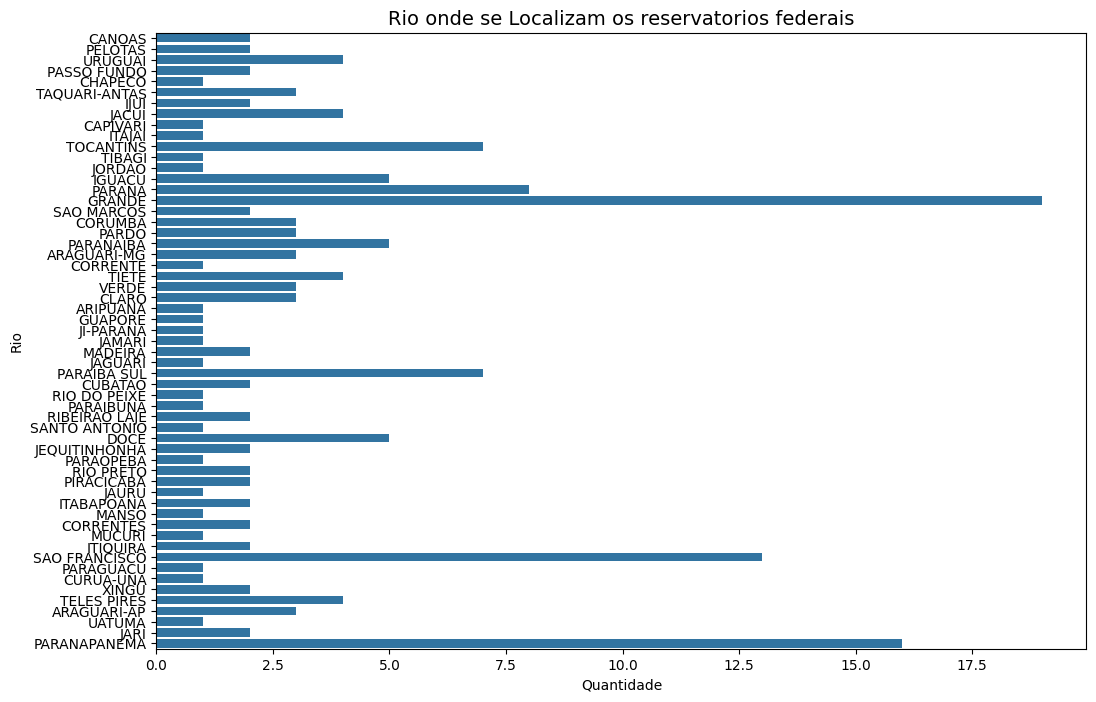

In [21]:
plt.figure(figsize=(12,8))
plt.title('Rio onde se Localizam os reservatorios federais',
          fontsize=14)
sns.countplot(y='rio',data=reservatorio)
plt.ylabel('Rio')
plt.xlabel('Quantidade')

Text(0, 0.5, 'Quantidade')

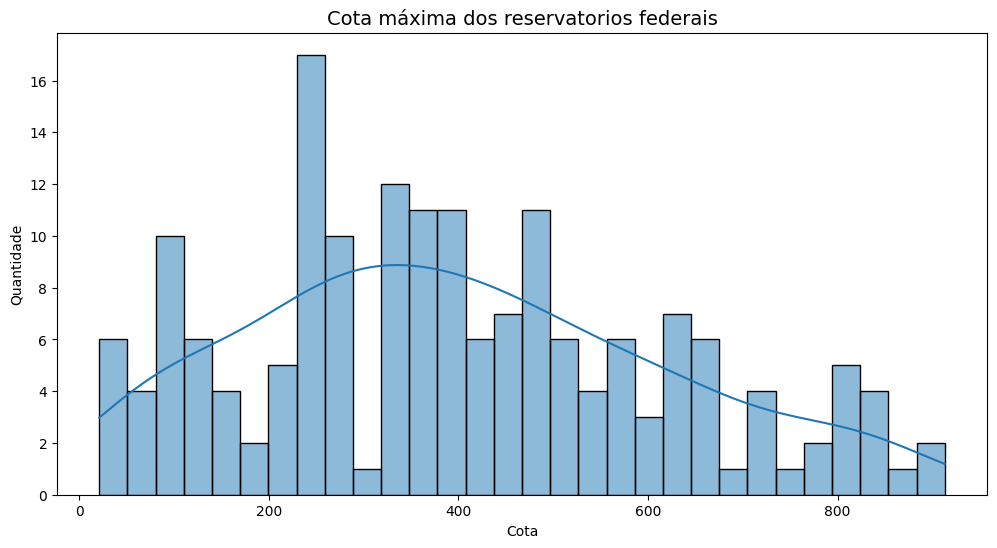

In [22]:
plt.figure(figsize=(12,6))
plt.title('Cota máxima dos reservatorios federais',
          fontsize=14)
sns.histplot(x='cota_maxima',data=reservatorio,bins=30,kde=True)
plt.xlabel('Cota')
plt.ylabel('Quantidade')

In [23]:
reservatorio.describe()

,data,cota_maxima,cota_minima,volume_maximo,volume_minimo,volume_util,produtividade_especifica,produtividade_65_volume_util,perda_carga,latitude,longitude,ano
count,175,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,1990-04-01 17:57:56.571428608,396.568114,389.817429,3606.150286,1921.155686,1929.575743,0.008822,0.651339,1.484114,-18.760453,-48.919440,1989.885714
min,1924-03-01 00:00:00,21.300000,20.300000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,-29.449444,-64.648611,1924.000000
25%,1973-03-01 00:00:00,245.750000,242.500000,116.915000,80.905000,14.610000,0.008761,0.235500,0.325000,-22.940000,-51.908056,1973.000000
50%,1999-01-01 00:00:00,372.930000,371.430000,620.000000,450.000000,106.630000,0.008917,0.386900,0.750000,-20.126944,-49.492500,1999.000000
75%,2006-06-29 00:00:00,552.000000,547.000000,3134.500000,2169.660000,929.445000,0.009019,0.781800,1.540000,-16.211389,-46.383194,2006.000000
max,2023-04-28 00:00:00,913.000000,899.000000,54400.000000,27695.190000,43250.000000,0.009218,6.354200,23.780000,0.915278,-37.796944,2023.000000
std,NaN,217.645847,214.022039,7877.517201,4007.052164,5638.851955,0.000700,0.839820,2.597611,6.909520,5.359592,20.755793


Text(0, 0.5, 'Quantidade')

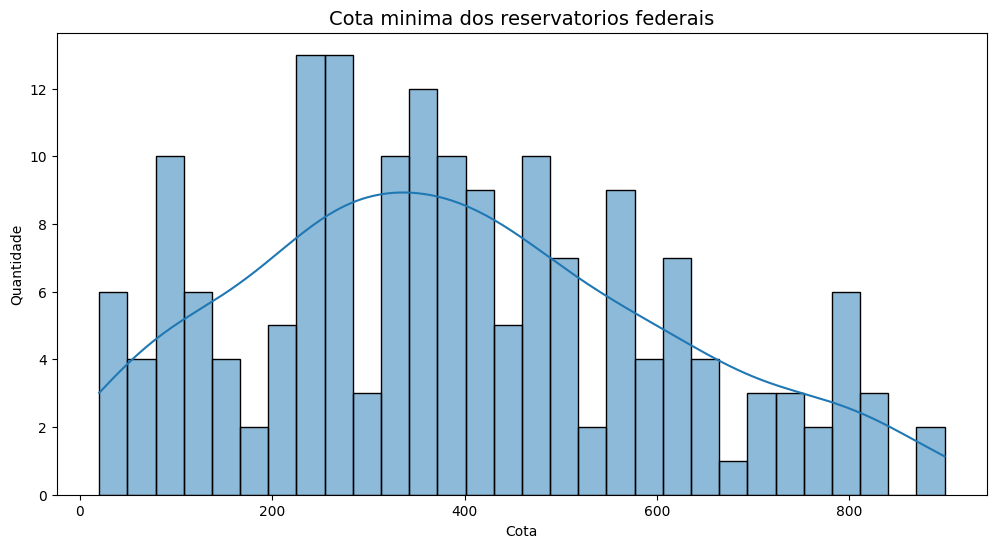

In [24]:
plt.figure(figsize=(12,6))
plt.title('Cota minima dos reservatorios federais',
          fontsize=14)
sns.histplot(x='cota_minima',data=reservatorio,bins=30,kde=True)
plt.xlabel('Cota')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

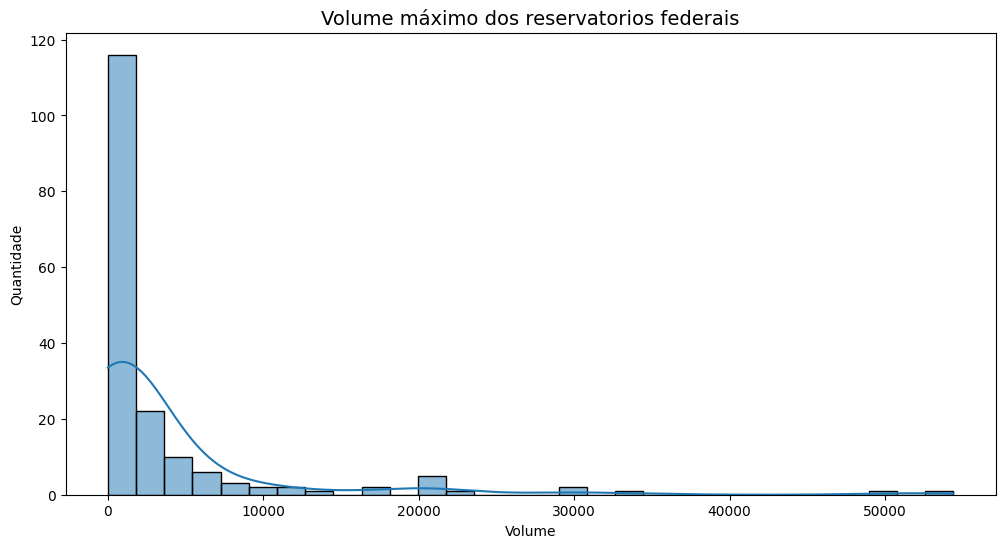

In [26]:
plt.figure(figsize=(12,6))
plt.title('Volume máximo dos reservatorios federais',
          fontsize=14)
sns.histplot(x='volume_maximo',data=reservatorio,bins=30,kde=True)
plt.xlabel('Volume')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

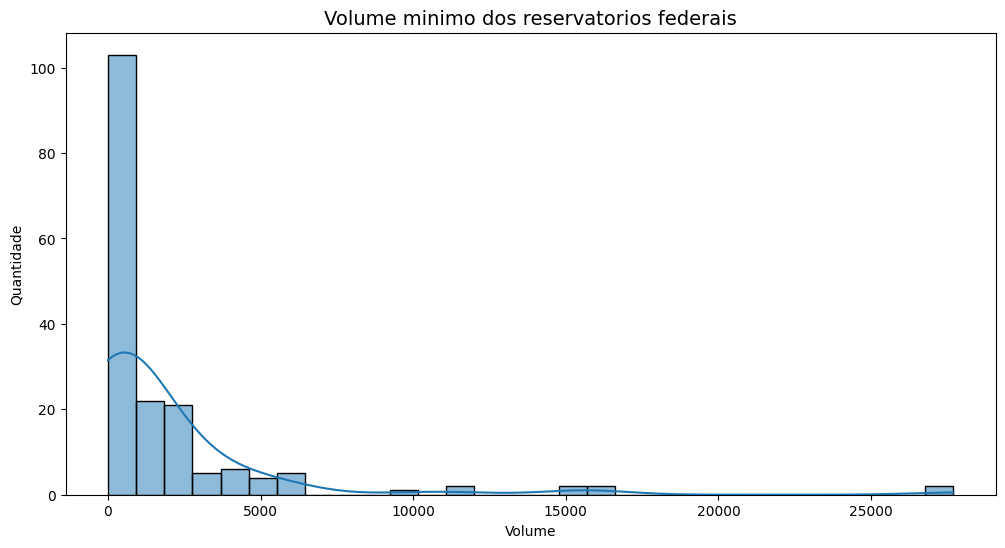

In [27]:
plt.figure(figsize=(12,6))
plt.title('Volume minimo dos reservatorios federais',
          fontsize=14)
sns.histplot(x='volume_minimo',data=reservatorio,bins=30,kde=True)
plt.xlabel('Volume')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

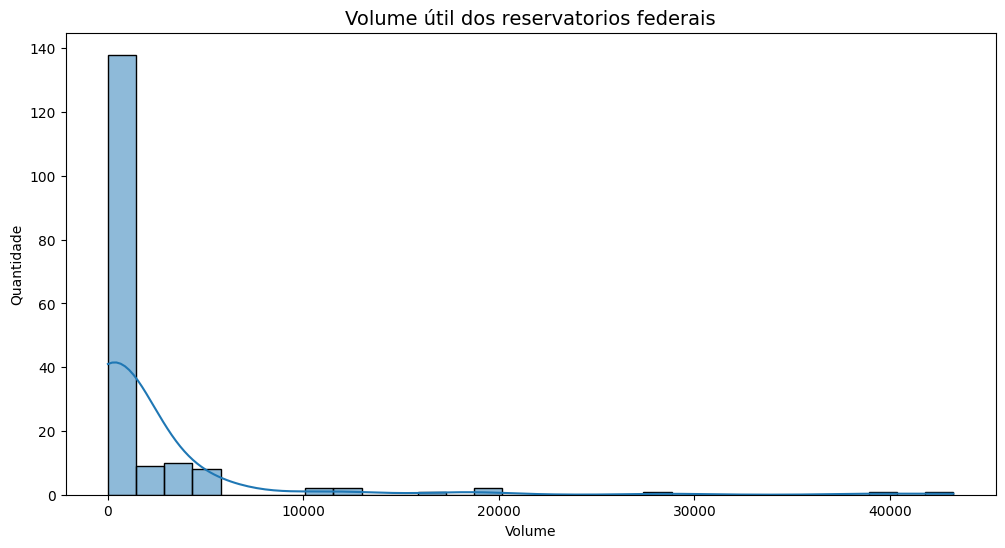

In [28]:
plt.figure(figsize=(12,6))
plt.title('Volume útil dos reservatorios federais',
          fontsize=14)
sns.histplot(x='volume_util',data=reservatorio,bins=30,kde=True)
plt.xlabel('Volume')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

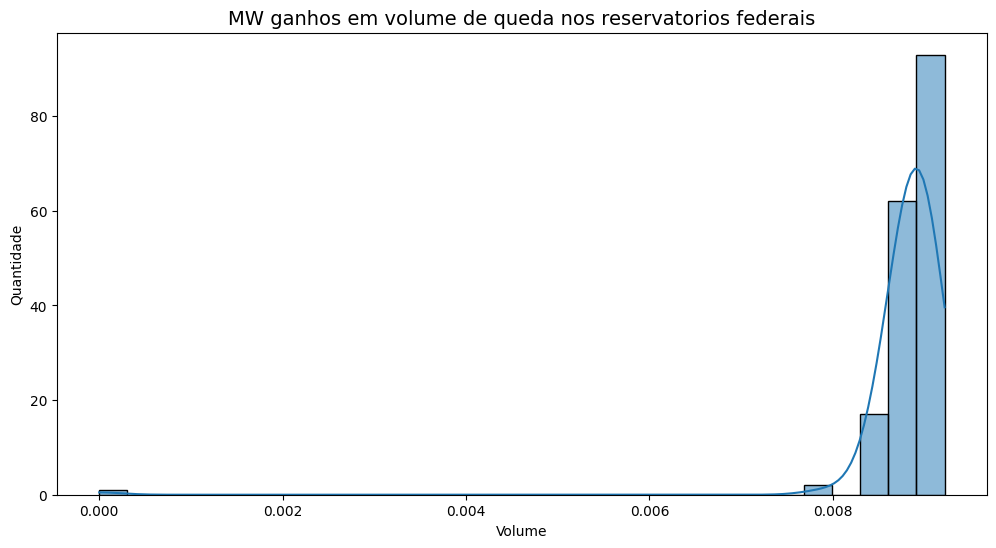

In [29]:
plt.figure(figsize=(12,6))
plt.title('MW ganhos em volume de queda nos reservatorios federais',
          fontsize=14)
sns.histplot(x='produtividade_especifica',data=reservatorio,bins=30,kde=True)
plt.xlabel('Volume')
plt.ylabel('Quantidade')

In [30]:
reservatorio.columns

Index(['data', 'subsistema', 'reservatorio_equivalente', 'reservatorio',
       'tipo_reservatorio', 'usina', 'bacia', 'rio', 'cota_maxima',
       'cota_minima', 'volume_maximo', 'volume_minimo', 'volume_util',
       'produtividade_especifica', 'produtividade_65_volume_util',
       'tipo_perda', 'perda_carga', 'latitude', 'longitude', 'estado_sigla',
       'ano'],
      dtype='object')

In [33]:
mapa_reservatorio = px.scatter_mapbox(reservatorio,lat='latitude',lon='longitude',hover_name='reservatorio',
                                      hover_data=['tipo_reservatorio','cota_minima','ano','bacia','rio'],
                                      title='reservatorios federais usado nas hidrelétricas')
mapa_reservatorio.update_layout(mapbox_style="open-street-map")
mapa_reservatorio.show()

A partir dessa informações da análise, podemos fazer as seguintes questões

- Os Estado onde se tem mais reservatorio implica em mais prdoução de energia elétrica (referente as hidrelétricas)?
- O volume do reservatorio influencia na produção de energia elétrica?
- A altura também influencia na produção de energia elétrica?
- Pode fazer comparação da localização dos reservatorios com com as estações meteorologicas